In [1]:
#엑셀 파일 읽기
import pandas as pd 
dfExcel = pd.read_excel('c:\\work\\demo.xlsx', 'Sheet1')

dfExcel

,사번,성별,나이,판매금액,수입
0,E001,M,34,123,350
1,E002,F,40,114,450
2,E003,F,37,135,169
3,E004,M,30,139,189
4,E005,F,44,117,183
5,E006,M,36,121,90
6,E007,M,32,133,166
7,E008,F,26,140,120
8,E009,M,32,133,75
9,E010,M,36,133,40


<Axes: title={'center': '남녀별 판매금액 합계'}, xlabel='성별', ylabel='판매금액 합계'>

C:\Users\student\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\P

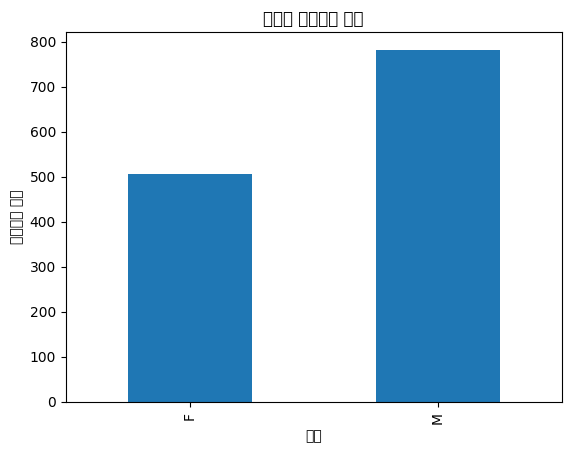

In [7]:
import matplotlib.pyplot as plt 
#남녀별 판매금액 합계 
var = dfExcel.groupby('성별').판매금액.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel('성별')
ax1.set_ylabel('판매금액 합계')
ax1.set_title('남녀별 판매금액 합계')
var.plot(kind='bar')

Text(0.5, 0, '단계')

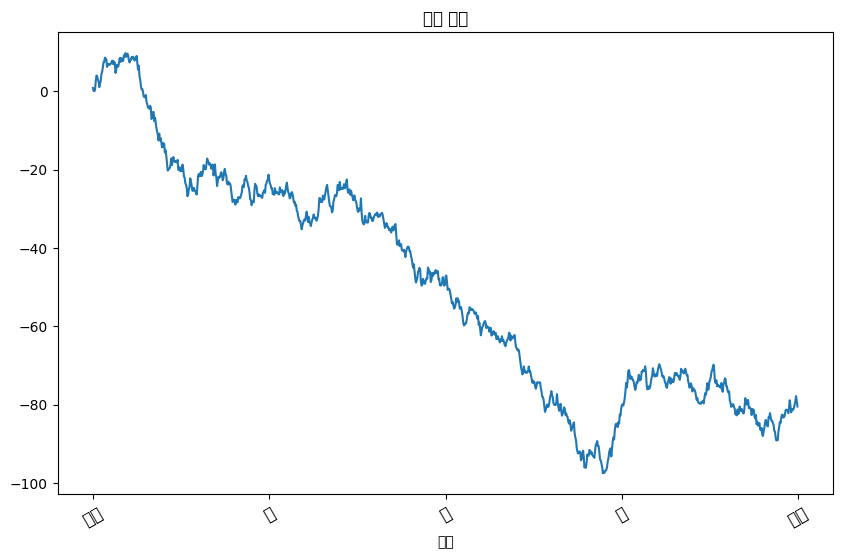

In [30]:
#눈금과 눈금간격, 범례를 지정하기 
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['하나', '둘', '셋', '넷', '다섯'], 
    rotation=30, fontsize='large')
ax.set_title('데모 차트')
ax.set_xlabel('단계')

In [24]:
#groupby()메서드 사용 
from pandas import Series, DataFrame
import numpy as np

df = DataFrame({'key1':['a','a','b','b','a'], 
                'key2':['one','two','one','two','one'], 
                'data1':np.random.randn(5), 
                'data2':np.random.randn(5)})

print( df ) 

grouped = df.groupby(["key1","key2"])["data1"]

print( grouped )
grouped.sum()


  key1 key2     data1     data2
0    a  one  0.777971 -0.830014
1    a  two  1.937903 -1.140755
2    b  one -1.604916  1.155139
3    b  two -0.003647 -0.592987
4    a  one -3.043879 -1.171572


key1  key2
a     one    -2.265908
      two     1.937903
b     one    -1.604916
      two    -0.003647
Name: data1, dtype: float64

In [ ]:
print( grouped.mean() )
print( grouped.sum() )
print( grouped.count() )

key1
a    1.198385
b   -0.248144
Name: data1, dtype: float64
key1
a    3.595156
b   -0.496289
Name: data1, dtype: float64
key1
a    3
b    2
Name: data1, dtype: int64


In [ ]:
means = df.groupby( ["key1","key2"] )["data1"].mean()
means

key1  key2
a     one     0.200187
      two     0.812707
b     one     1.492476
      two    -0.250131
Name: data1, dtype: float64

In [8]:
# concat 메서드는 기본적으로 같은 컬럼 레이블을 갖는 
# 데이터프레임 객체를 위/아래로 연결합니다. 
# axis=1 파라미터를 전달하면 리스트로 전달된 데이터프레임을 
# 좌/우로 연결합니다. 
# 이때 데이터프레임들은 인덱스를 기준으로 데이터를 연결합니다.
from pandas import DataFrame 
import pandas as pd 
#첫번째 데이터프레임
data = { 
        '종가':[113000,111500],
        '거래량':[555850, 282163]
        }
index = ['2019-06-21','2019-06-20']
df1 = DataFrame(data=data, index=index)
#두번째
data = { 
        '시가':[112500,111000],
        '고가':[115000, 112000],
        '저가':[111500, 109000]
        }
index = ['2019-06-21','2019-06-20']
df2 = DataFrame(data=data, index=index)

In [9]:
df = pd.concat([df1, df2], axis=1)
#좌우로 붙이기 
df


,종가,거래량,시가,고가,저가
2019-06-21,113000,555850,112500,115000,111500
2019-06-20,111500,282163,111000,112000,109000


In [ ]:
#컬럼을 순서를 변경해 봅니다.
print("---정렬순서를 변경---")
정렬순서 = ['시가','고가','저가','종가','거래량']
df = df[정렬순서]
df

---정렬순서를 변경---


,시가,고가,저가,종가,거래량
2019-06-21,112500,115000,111500,113000,555850
2019-06-20,111000,112000,109000,111500,282163


In [4]:
#위/아래로 붙이기 
# 이번에는 데이터프레임을 위/아래로 이어 붙여 보겠습니다. 
# 두 개의 데이터프레임의 컬럼을 기준으로 정렬한 후 위/아래로 붙여서 
# 새로운 데이터프레임을 생성할 수 있습니다. 
from pandas import DataFrame
import pandas as pd

# 첫 번째 데이터프레임
data = {
    '종가': [113000, 111500],
    '거래량': [555850, 282163]
}
index = ["2019-06-21", "2019-06-20"]
df1 = DataFrame(data, index=index)

# 두 번째 데이터프레임
data = {
    '종가': [110000, 483689],
    '거래량': [109000, 791946]
}
index = ["2019-06-19", "2019-06-18"]
df2 = DataFrame(data, index=index)

print( df1 )
print( df2 )

                종가     거래량
2019-06-21  113000  555850
2019-06-20  111500  282163
                종가     거래량
2019-06-19  110000  109000
2019-06-18  483689  791946


In [12]:
print("---위아래 붙이기---")
df = pd.concat([df1, df2])
df

---위아래 붙이기---


,종가,거래량,시가,고가,저가
2019-06-21,113000.0,555850.0,NaN,NaN,NaN
2019-06-20,111500.0,282163.0,NaN,NaN,NaN
2019-06-21,NaN,NaN,112500.0,115000.0,111500.0
2019-06-20,NaN,NaN,111000.0,112000.0,109000.0


In [ ]:
# 데이터프레임이 여러 개인 경우 concat 함수를 사용하면 편리합니다.
print("---concat메서드로 위아래 붙이기---")
df = pd.concat([df1, df2])
df


---concat메서드로 위아래 붙이기---


,종가,거래량
2019-06-21,113000,555850
2019-06-20,111500,282163
2019-06-19,110000,109000
2019-06-18,483689,791946


In [15]:
#Merge
# 판다스의 merge는 데이터프레임을 '병합'합니다. 
# concat이 단순히 두 데이터프레임을 이어 붙이는 연결이라면 
# merge는 특정 컬럼의 값을 기준으로 데이터를 병합합니다. 
from pandas import DataFrame
import pandas as pd

# 첫 번째 데이터프레임
data = [
    ["전기전자", "005930", "삼성전자", 74400],
    ["화학", "051910", "LG화학", 896000],
    ["전기전자", "000660", "SK하이닉스", 101500]
]

columns = ["업종", "종목코드", "종목명", "현재가"]
df1 = DataFrame(data=data, columns=columns)

# 두 번째 데이터프레임
data = [
    ["은행", 2.92],
    ["보험", 0.37],
    ["화학", 0.06],
    ["전기전자", -2.43]
]

columns = ["업종","등락률"]
df2 = DataFrame(data=data, columns=columns)

print( df1 )
print( df2 )

     업종    종목코드     종목명     현재가
0  전기전자  005930    삼성전자   74400
1    화학  051910    LG화학  896000
2  전기전자  000660  SK하이닉스  101500
     업종   등락률
0    은행  2.92
1    보험  0.37
2    화학  0.06
3  전기전자 -2.43


In [16]:
#왼쪽(df1), 오른쪽(df2)
print("---merge메서드로 붙이기---")
df = pd.merge(left=df1, right=df2, on='업종')
df

---merge메서드로 붙이기---


,업종,종목코드,종목명,현재가,등락률
0,전기전자,005930,삼성전자,74400,-2.43
1,전기전자,000660,SK하이닉스,101500,-2.43
2,화학,051910,LG화학,896000,0.06


In [ ]:
# how 파라미터를 사용해서 합치는 방법을 지정할 수 있습니다. 
# 'inner' 모드를 사용하면 df1과 df2의 교집합, 
# 'outer' 모드를 사용하면 합집합으로 병합됩니다. 
# 모드에 따른 동작은 concat에서 사용해 본 것처럼 일관성 있게 
# 설계돼 있습니다. 
# 추가로 merge에서 사용할 수 있는 left, right 옵션에 
# 대해 알아봅시다. 추가 옵션에 사용할 데이터를 우선 정의합니다. 
# 이전 코드에서 df1의 데이터만 일부 변경했습니다.
# 첫 번째 데이터프레임
data = [
    ["전기전자", "005930", "삼성전자", 74400],
    ["화학", "051910", "LG화학", 896000],
    ["서비스업", "035720", "카카오", 121500]
]

columns = ["업종", "종목코드", "종목명", "현재가"]
df1 = DataFrame(data=data, columns=columns)

# 두 번째 데이터프레임
data = [
    ["은행", 2.92],
    ["보험", 0.37],
    ["화학", 0.06],
    ["전기전자", -2.43]
]

columns = ["업종", "등락률"]
df2 = DataFrame(data=data, columns=columns)

In [ ]:
# 두 데이터프레임을 병합할 때 left 옵션을 사용해 보겠습니다. 
# 이는 left 파라미터에 입력된 데이터프레임 df1을 기준으로 
# 두 데이터프레임을 병합합니다.
print("---merge메서드에서 how=left지정하기---")
df = pd.merge(left=df1, right=df2, 
    how='left', on='업종')
df

---merge메서드에서 how=left지정하기---


,업종,종목코드,종목명,현재가,등락률
0,전기전자,005930,삼성전자,74400,-2.43
1,화학,051910,LG화학,896000,0.06
2,전기전자,000660,SK하이닉스,101500,-2.43


In [ ]:
# 두 데이터프레임을 병합할 때 right 옵션을 사용해 보겠습니다. 
# 이는 right 파라미터에 입력된 데이터프레임 df2을 기준으로 
# 두 데이터프레임을 병합합니다.
print("---merge메서드에서 how=right지정하기---")
df = pd.merge(left=df1, right=df2, 
    how='right', on='업종')
df

---merge메서드에서 how=right지정하기---


,업종,종목코드,종목명,현재가,등락률
0,은행,NaN,NaN,NaN,2.92
1,보험,NaN,NaN,NaN,0.37
2,화학,051910,LG화학,896000.0,0.06
3,전기전자,005930,삼성전자,74400.0,-2.43
4,전기전자,000660,SK하이닉스,101500.0,-2.43


In [ ]:
# 만약 두 데이터프레임의 컬럼이 다르다면 어떻게 해야 할까요? 
# 물론 컬럼의 이름을 변경하고 데이터프레임을 합칠 수 있지만, 
# 코드의 양만 많아집니다. 
# 다음 예제와 함께 merge의 옵션을 사용해서 한 번에 문제를 해결해 봅시다. 
# 이전 코드에서 두 번째 데이터프레임의 컬럼 이름만을 다르게 정의했습니다.
# 첫 번째 데이터프레임
data = [
    ["전기전자", "005930", "삼성전자", 74400],
    ["화학", "051910", "LG화학", 896000],
    ["서비스업", "035720", "카카오", 121500]
]

columns = ["업종", "종목코드", "종목명", "현재가"]
df1 = DataFrame(data=data, columns=columns)

# 두 번째 데이터프레임
data = [
    ["은행", 2.92],
    ["보험", 0.37],
    ["화학", 0.06],
    ["전기전자", -2.43]
]

columns = ["항목", "등락률"]
df2 = DataFrame(data=data, columns=columns)

In [ ]:
# 두 데이터프레임의 컬럼 이름이 다르기 때문에 합칠 기준이되는 각 컬럼의 이름을 
# 모두 입력해야 합니다. 
# left_on와 right_on 파라미터에 두 컬럼 이름을 넣습니다.
print("---기준이 되는 컬럼명이 다른 경우---")
df = pd.merge(left=df1, 
    right=df2, left_on='업종',
    right_on='항목')
df

---기준이 되는 컬럼명이 다른 경우---


,업종,종목코드,종목명,현재가,항목,등락률
0,전기전자,005930,삼성전자,74400,전기전자,-2.43
1,화학,051910,LG화학,896000,화학,0.06


In [ ]:
#아래와 같은 간단한 데이터에 대한 통계를 구해봅니다. 
df = DataFrame({'key1':['a','a','b','b','a'], 
                'key2':['one','two','one','two','one'], 
                'data1':np.random.randn(5), 
                'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.124304,-1.559011
1,a,two,-1.602948,-0.264338
2,b,one,-0.585152,-0.610723
3,b,two,0.516357,0.225101
4,a,one,0.752153,-0.530584


In [ ]:
#그룹으로 생성해서 집계된 데이터에 접근합니다. 
grouped = df.groupby("key1")["data1"] 
grouped 

In [ ]:
print(grouped.mean())
print(grouped.sum())
print(grouped.count())

key1
a   -0.658367
b   -0.034398
Name: data1, dtype: float64
key1
a   -1.975100
b   -0.068795
Name: data1, dtype: float64
key1
a    3
b    2
Name: data1, dtype: int64
